In [1]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('titanic_train.csv')
test_data = pd.read_csv('titanic_train.csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [4]:
train_data.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [5]:
train_data.dtypes

passenger_id      int64
pclass            int64
name             object
sex              object
age             float64
sibsp             int64
parch             int64
ticket           object
fare            float64
cabin            object
embarked         object
boat             object
body            float64
home.dest        object
survived          int64
dtype: object

In [6]:
train_data.shape


(850, 15)

In [7]:
train_data.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

In [8]:
train_data.drop('body', axis=1, inplace=True)

In [9]:
train_data.drop('cabin', axis=1, inplace=True)

In [10]:
train_data.dtypes

passenger_id      int64
pclass            int64
name             object
sex              object
age             float64
sibsp             int64
parch             int64
ticket           object
fare            float64
embarked         object
boat             object
home.dest        object
survived          int64
dtype: object

In [11]:
train_data.describe()

,passenger_id,pclass,age,sibsp,parch,fare,survived
count,850.000000,850.00000,676.000000,850.000000,850.000000,849.000000,850.000000
mean,662.816471,2.32000,29.519847,0.522353,0.382353,34.012701,0.368235
std,380.751936,0.83853,14.562243,1.112132,0.879511,53.705779,0.482610
min,1.000000,1.00000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,332.250000,2.00000,20.000000,0.000000,0.000000,7.895800,0.000000
50%,676.500000,3.00000,28.000000,0.000000,0.000000,14.108300,0.000000
75%,992.250000,3.00000,37.000000,1.000000,0.000000,31.000000,1.000000
max,1307.000000,3.00000,80.000000,8.000000,9.000000,512.329200,1.000000


In [12]:
train_data['age'].median()

28.0

In [13]:
train_data['age'].mode()

0    18.0
dtype: float64

In [14]:
train_data['age'] = train_data['age'].fillna(train_data['age'].median())


In [15]:
train_data['fare'] = train_data['fare'].fillna(train_data['fare'].mean())

In [16]:
train_data['embarked'] = train_data['embarked'].fillna(train_data['embarked'].mode())

In [17]:
train_data = pd.get_dummies(train_data, columns = ['sex'], prefix = 'gender')

In [18]:
train_data['embarked'].value_counts()

S    589
C    176
Q     84
Name: embarked, dtype: int64

In [19]:
train_data = pd.get_dummies(train_data, columns = ['embarked'], prefix = 'emb')

In [20]:
train_data['survived'].value_counts()

0    537
1    313
Name: survived, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

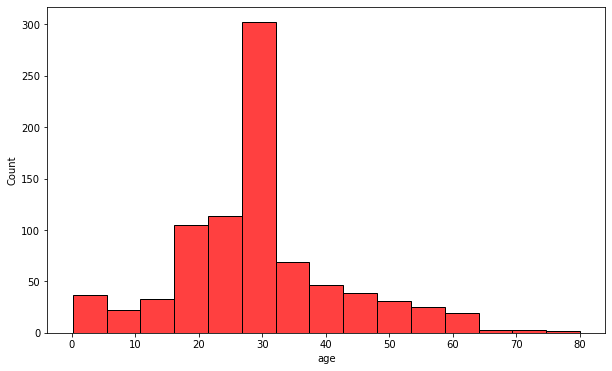

In [21]:
plt.figure(figsize = (10, 6))
sns.histplot(train_data['age'], bins = 15, color = 'red')

<AxesSubplot:xlabel='survived', ylabel='fare'>

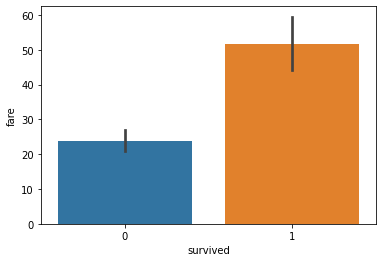

In [22]:
sns.barplot(x = 'survived', y = 'fare',data = train_data)

In [23]:
X = train_data[['pclass', 'age', 'sibsp', 'parch', 'fare', 'gender_female', 'gender_male', 'emb_C', 'emb_Q', 'emb_S']]
y = train_data['survived']

In [24]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
log_reg_model = LogisticRegression()

In [26]:
log_reg_model.fit(X_train, y_train)

/home/acer/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
log_reg_pred = log_reg_model.predict(X_valid)

In [28]:
accuracy_score(log_reg_pred, y_valid)

0.7764705882352941

In [82]:
confusion_matrix(log_reg_pred, y_valid)

array([[88, 24],
       [14, 44]])